# 英文NLP基礎教學

In [135]:
import pandas as pd

import nltk

from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
from nltk.stem.lancaster import LancasterStemmer
lancaster_stemmer = LancasterStemmer()
from nltk.stem import SnowballStemmer
snowball_stemmer = SnowballStemmer('english')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()


from nltk.corpus import stopwords
stops = stopwords.words('english')
from string import punctuation

In [136]:
#=============自己實作==========================


sentence = '''At eight o'clock on Thursday morning
... Arthur didn't feel very good'''


tokens1 = nltk.word_tokenize(sentence)
tokens2 = nltk.wordpunct_tokenize(sentence)

#=============判斷詞性=========================
tagged = nltk.pos_tag(tokens) 
print(tokens1)
print(tokens2)
print(tagged)

['At', 'eight', "o'clock", 'on', 'Thursday', 'morning', '...', 'Arthur', 'did', "n't", 'feel', 'very', 'good']
['At', 'eight', 'o', "'", 'clock', 'on', 'Thursday', 'morning', '...', 'Arthur', 'didn', "'", 't', 'feel', 'very', 'good']
[('This', 'DT'), ('value', 'NN'), ('is', 'VBZ'), ('also', 'RB'), ('called', 'VBN'), ('cut', 'VBN'), ('-', ':'), ('off', 'RB'), ('in', 'IN'), ('the', 'DT'), ('literature', 'NN'), ('.', '.'), ('If', 'IN'), ('float', 'NN'), (',', ','), ('the', 'DT'), ('parameter', 'NN'), ('represents', 'VBZ'), ('a', 'DT'), ('proportion', 'NN'), ('of', 'IN'), ('documents', 'NNS'), (',', ','), ('integer', 'NN'), ('absolute', 'NN'), ('counts', 'NNS'), ('.', '.')]


In [137]:
testStr = "This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts."
# 請使用nltk.word_tokenize及nltk.wordpunct_tokenize進行分詞，並比較其中差異。
#=============your works starts===============#
word_tokenize_tokens = nltk.word_tokenize(testStr)
wordpunct_tokenize_tokens = nltk.wordpunct_tokenize(testStr)
#==============your works ends================#

print("/".join(word_tokenize_tokens))
print("/".join(wordpunct_tokenize_tokens))
# This/value/is/also/called/cut-off/in/the/literature/./If/float/,/the/parameter/represents/a/proportion/of/documents/,/integer/absolute/counts/.
# This/value/is/also/called/cut/-/off/in/the/literature/./If/float/,/the/parameter/represents/a/proportion/of/documents/,/integer/absolute/counts/.

This/value/is/also/called/cut-off/in/the/literature/./If/float/,/the/parameter/represents/a/proportion/of/documents/,/integer/absolute/counts/.
This/value/is/also/called/cut/-/off/in/the/literature/./If/float/,/the/parameter/represents/a/proportion/of/documents/,/integer/absolute/counts/.


In [138]:
tokens = wordpunct_tokenize_tokens
df = pd.DataFrame(index = tokens)
# 請使用porter_stemmer, lancaster_stemmer, snowball_stemmer, wordnet_lemmatizer，進行stemming或是lemmatize，並放到一個df比較其中差異
#=============your works starts===============#
df['porter_stemmer'] = [porter_stemmer.stem(t) for t in tokens]
df['lancaster_stemmer'] = [lancaster_stemmer.stem(t) for t in tokens]
df['snowball_stemmer'] = [snowball_stemmer.stem(t) for t in tokens]
df['wordnet_lemmatizer'] = [wordnet_lemmatizer.lemmatize(t) for t in tokens]
#==============your works ends================#

print(df.iloc[0].tolist())
print(df.iloc[1].tolist())
# ['thi', 'thi', 'this', 'This']
# ['valu', 'valu', 'valu', 'value']

df

['thi', 'thi', 'this', 'This']
['valu', 'valu', 'valu', 'value']


,porter_stemmer,lancaster_stemmer,snowball_stemmer,wordnet_lemmatizer
This,thi,thi,this,This
value,valu,valu,valu,value
is,is,is,is,is
also,also,also,also,also
called,call,cal,call,called
cut,cut,cut,cut,cut
-,-,-,-,-
off,off,off,off,off
in,in,in,in,in
the,the,the,the,the


In [139]:
print("標點符號")
print(punctuation)
print("停用字")
print(stops)

標點符號
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
停用字
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'no

In [140]:
df = pd.DataFrame(index = [t for t in tokens if t not in stops and t not in punctuation])
# 請使用porter_stemmer, lancaster_stemmer, snowball_stemmer, wordnet_lemmatizer，進行stemming或是lemmatize，並放到一個df比較其中差異
# 請去除標點符號與停用字
#=============your works starts===============#

df['porter_stemmer'] = [porter_stemmer.stem(t) for t in tokens if t not in punctuation and t not in stops]

df['lancaster_stemmer'] = [lancaster_stemmer.stem(t) for t in tokens if t not in punctuation and t not in stops]

df['snowball_stemmer'] = [snowball_stemmer.stem(t) for t in tokens if t not in punctuation and t not in stops]

df['wordnet_lemmatizer'] = [wordnet_lemmatizer.lemmatize(t) for t in tokens if t not in punctuation and t not in stops]

#==============your works ends================#

df

,porter_stemmer,lancaster_stemmer,snowball_stemmer,wordnet_lemmatizer
This,thi,thi,this,This
value,valu,valu,valu,value
also,also,also,also,also
called,call,cal,call,called
cut,cut,cut,cut,cut
literature,literatur,lit,literatur,literature
If,If,if,if,If
float,float,flo,float,float
parameter,paramet,paramet,paramet,parameter
represents,repres,repres,repres,represents


In [141]:
df_tag = pd.DataFrame(index = tokens)
# 請使用nltk.pos_tag進行詞性標記，並嘗試設定參數tagset='universal'
#=============your works starts===============#
df_tag['default'] = nltk.pos_tag(tokens)
df_tag['universal'] = nltk.pos_tag(tokens,tagset='universal')
# df_gg = nltk.pos_tag_sents('sentence')
#==============your works ends================#
# print(df_gg)
df_tag

,default,universal
This,"(This, DT)","(This, DET)"
value,"(value, NN)","(value, NOUN)"
is,"(is, VBZ)","(is, VERB)"
also,"(also, RB)","(also, ADV)"
called,"(called, VBN)","(called, VERB)"
cut,"(cut, VBN)","(cut, VERB)"
-,"(-, :)","(-, .)"
off,"(off, RB)","(off, ADV)"
in,"(in, IN)","(in, ADP)"
the,"(the, DT)","(the, DET)"


# 建立詞向量

In [142]:
import numpy as np
import pandas as pd
import nltk
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

from nltk.corpus import stopwords
stops = stopwords.words('english')
from string import punctuation

In [143]:
corpus = ["what time is it?", "how long has it been since we started?", "that's a long time ago"]
df = pd.DataFrame(corpus, columns=['sentence'])
df

,sentence
0,what time is it?
1,how long has it been since we started?
2,that's a long time ago


In [144]:
# 請使用nltk.word_tokenize將每一行的詞彙切開
#=============your works starts===============#
df['tokenize'] = df['sentence'].apply(nltk.word_tokenize)

# (df['sentence'])
#==============your works ends================#


df['tokenize']
# 0                              [what, time, is, it, ?]
# 1    [how, long, has, it, been, since, we, started, ?]
# 2                       [that, 's, a, long, time, ago]
# Name: tokenize, dtype: object

0                              [what, time, is, it, ?]
1    [how, long, has, it, been, since, we, started, ?]
2                       [that, 's, a, long, time, ago]
Name: tokenize, dtype: object

In [145]:
np.hstack([ s for s in df['tokenize']])

array(['what', 'time', 'is', 'it', '?', 'how', 'long', 'has', 'it',
       'been', 'since', 'we', 'started', '?', 'that', "'s", 'a', 'long',
       'time', 'ago'], dtype='<U7')

In [146]:
# 請找出不重複的所有出現過的字
#=============your works starts===============#
word_index = set(np.hstack([ s for s in df['tokenize']]))
#==============your works ends================#

print("len(word_index)", len(word_index))
print(word_index)
# len(word_index) 16
# {'is', 'that', 'time', 'long', 'we', 'ago', 'started', 'has', 'been', 'a', "'s", 'how', 'what', 'it', 'since', '?'}

len(word_index) 16
{'since', 'ago', 'it', '?', 'has', "'s", 'is', 'been', 'started', 'a', 'we', 'that', 'time', 'what', 'long', 'how'}


In [147]:
for column in word_index:
    # 請幫每一個字創造一個欄位並指派為0
    #=============your works starts===============#
    df[column] = 0
    #==============your works ends================#

    
print(df.columns)
df
# Index(['sentence', 'tokenize', 'is', 'that', 'time', 'long', 'we', 'ago',
#        'started', 'has', 'been', 'a', ''s', 'how', 'what', 'it', 'since', '?'],
#       dtype='object')

Index(['sentence', 'tokenize', 'since', 'ago', 'it', '?', 'has', ''s', 'is',
       'been', 'started', 'a', 'we', 'that', 'time', 'what', 'long', 'how'],
      dtype='object')


,sentence,tokenize,since,ago,it,?,has,'s,is,been,started,a,we,that,time,what,long,how
0,what time is it?,"[what, time, is, it, ?]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,how long has it been since we started?,"[how, long, has, it, been, since, we, started, ?]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,that's a long time ago,"[that, 's, a, long, time, ago]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [148]:
def build_word_index(row):
    print(df['tokenize'])
#     return df['tokenize']

df.apply(build_word_index, axis=1)


0                              [what, time, is, it, ?]
1    [how, long, has, it, been, since, we, started, ?]
2                       [that, 's, a, long, time, ago]
Name: tokenize, dtype: object
0                              [what, time, is, it, ?]
1    [how, long, has, it, been, since, we, started, ?]
2                       [that, 's, a, long, time, ago]
Name: tokenize, dtype: object
0                              [what, time, is, it, ?]
1    [how, long, has, it, been, since, we, started, ?]
2                       [that, 's, a, long, time, ago]
Name: tokenize, dtype: object


0    None
1    None
2    None
dtype: object

In [149]:
def build_word_index(row):
    tokens = row['tokenize']
    for token in tokens:
        # 請幫計算每個字，在這個句子中出現的次數
        #=============your works starts===============#
        row[token] = row[token] + 1 
        #==============your works ends================#
    return row

df_processed = df.apply(build_word_index, axis=1)

print(df_processed.iloc[0].tolist())
# ['what time is it?', ['what', 'time', 'is', 'it', '?'], 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1]
df_processed

['what time is it?', ['what', 'time', 'is', 'it', '?'], 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0]


,sentence,tokenize,since,ago,it,?,has,'s,is,been,started,a,we,that,time,what,long,how
0,what time is it?,"[what, time, is, it, ?]",0,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0
1,how long has it been since we started?,"[how, long, has, it, been, since, we, started, ?]",1,0,1,1,1,0,0,1,1,0,1,0,0,0,1,1
2,that's a long time ago,"[that, 's, a, long, time, ago]",0,1,0,0,0,1,0,0,0,1,0,1,1,0,1,0


# 中文NLP教學

In [150]:
# import jieba
# import requests
# res =requests.get('https://github.com/APCLab/jieba-tw/blob/master/jieba/dict.txt')
# with open('dict.txt','w',encoding='utf-8') as f:
#     f.write(res.text)

In [151]:
import jieba
jieba.set_dictionary('dict.txt.big')  # 如果是使用繁體文字，請記得去下載繁體字典來使用
with open('stops.txt', 'r', encoding='utf8') as f:  # 中文的停用字，我也忘記從哪裡拿到的，效果還可以，繁體字的資源真的比較少，大家將就一下吧
    stops = f.read().split('\n') 

In [152]:
test_str = "下雨天留客天留我不留"

# 請使用jieba.cut進行斷詞，並嘗試使用全斷詞模式(cut_all=True)
#=============your works starts===============#
result_cut =  [t for t in  jieba.cut(test_str)]
result_cutall = [t for t in  jieba.cut(test_str,cut_all=True)]
#==============your works ends================#


print(result_cut)
print(result_cutall)
# ['下雨天', '留客', '天留', '我', '不留']
# ['下雨', '下雨天', '雨天', '留客', '天', '留', '我', '不留']

Building prefix dict from C:\Python\Python36\IIIMaterial\08_InformationRetreival\dict.txt.big ...
Loading model from cache C:\Users\Student\AppData\Local\Temp\jieba.uff98048124f5688e07c8dae0a6df90a2.cache
Loading model cost 1.144 seconds.
Prefix dict has been built succesfully.


['下雨天', '留客', '天留', '我', '不留']
['下雨', '下雨天', '雨天', '留客', '天', '留', '我', '不留']


In [153]:
print("停用字")
print(stops[:100])

停用字
['\ufeff\ufeff,', '', '、', '。', '“', '”', '《', '》', '！', '，', '：', '；', '？', '人民', '末##末', '啊', '阿', '哎', '哎呀', '哎喲', '唉', '我', '我們', '按', '按照', '依照', '吧', '吧噠', '把', '罷了', '被', '本', '本著', '比', '比方', '比如', '鄙人', '彼', '彼此', '邊', '別', '別的', '別說', '並', '並且', '不比', '不成', '不單', '不但', '不獨', '不管', '不光', '不過', '不僅', '不拘', '不論', '不怕', '不然', '不如', '不特', '不惟', '不問', '不只', '朝', '朝著', '趁', '趁著', '乘', '沖', '除', '除此之外', '除非', '除了', '此', '此間', '此外', '從', '從而', '打', '待', '但', '但是', '當', '當著', '到', '得', '的', '的話', '等', '等等', '地', '第', '叮咚', '對', '對於', '多', '多少', '而', '而況', '而且']


In [154]:
from collections import Counter
from wordcloud import WordCloud
from matplotlib import pyplot as plt

testStr = """自然語言處理大體是從1950年代開始，雖然更早期也有作為。1950年，圖靈發表論文「電腦器與智慧型」，提出現在所謂的「圖靈測試」作為判斷智慧型的條件。
1954年的喬治城實驗涉及全部自動翻譯超過60句俄文成為英文。研究人員聲稱三到五年之內即可解決機器翻譯的問題。[1]不過實際進展遠低於預期，1966年的ALPAC報告發現十年研究未達預期目標，機器翻譯的研究經費遭到大幅削減。一直到1980年代末期，統計機器翻譯系統發展出來，機器翻譯的研究才得以更上一層樓。
1960年代發展特別成功的NLP系統包括SHRDLU——一個詞彙設限、運作於受限如「積木世界」的一種自然語言系統，以及1964-1966年約瑟夫·維森鮑姆類比「個人中心治療」而設計的ELIZA——幾乎未運用人類思想和感情的訊息，有時候卻能呈現令人訝異地類似人之間的互動。「病人」提出的問題超出ELIZA 極小的知識範圍之時，可能會得到空泛的回答。例如問題是「我的頭痛」，回答是「為什麼說你頭痛？」
1970年代，程式設計師開始設計「概念本體論」（conceptual ontologies）的程式，將現實世界的資訊，架構成電腦能夠理解的資料。實例有MARGIE、SAM、PAM、TaleSpin、QUALM、Politics以及Plot Unit。許多聊天機器人在這一時期寫成，包括PARRY 、Racter 以及Jabberwacky 。
一直到1980年代，多數自然語言處理系統是以一套複雜、人工訂定的規則為基礎。不過從1980年代末期開始，語言處理引進了機器學習的演算法，NLP產生革新。成因有兩個：運算能力穩定增加（參見摩爾定律）；以及喬姆斯基 語言學理論漸漸喪失主導（例如轉換-生成文法）。該理論的架構不傾向於語料庫——機器學習處理語言所用方法的基礎。有些最早期使用的機器學習演算法，例如決策樹，是硬性的、「如果-則」規則組成的系統，類似當時既有的人工訂定的規則。不過詞性標記將隱馬爾可夫模型引入NLP，並且研究日益聚焦於軟性的、以機率做決定的統計模型，基礎是將輸入資料裡每一個特性賦予代表其份量的數值。許多語音識別現今依賴的快取語言模型即是一種統計模型的例子。這種模型通常足以處理非預期的輸入資料，尤其是輸入有錯誤（真實世界的資料總免不了），並且在整合到包含多個子任務的較大系統時，結果比較可靠。
許多早期的成功屬於機器翻譯領域，尤其歸功IBM的研究，漸次發展出更複雜的統計模型。這些系統得以利用加拿大和歐盟現有的語料庫，因為其法律規定政府的會議必須翻譯成所有的官方語言。不過，其他大部分系統必須特別打造自己的語料庫，一直到現在這都是限制其成功的一個主要因素，於是大量的研究致力於從有限的資料更有效地學習。
近來的研究更加聚焦於非監督式學習和半監督學習的演算法。這種演算法，能夠從沒有人工註解理想答案的資料裡學習。大體而言，這種學習比監督學習困難，並且在同量的資料下，通常產生的結果較不準確。不過沒有註解的資料量極巨（包含了全球資訊網），彌補了較不準確的缺點。
近年來, 深度學習技巧紛紛出爐[2][3] 在自然語言處理方面獲得最尖端的成果，例如語言模型[4]、語法分析[5][6]等等。"""

# 請用全斷詞模式對上面文章段落進行分詞
# 然後計算每一個詞彙出現過的次數，並將出現較多次的排到前面
#=============your works starts===============#
terms = [t for t in jieba.cut(testStr,cut_all=True) if t not in stops]
terms_sorted = sorted(Counter(terms).items(), key=lambda x:x[1] , reverse= True)
#==============your works ends================#

print(terms_sorted)

[('語言', 10), ('學習', 10), ('機器', 9), ('研究', 8), ('系統', 8), ('資料', 8), ('翻譯', 7), ('模型', 7), ('處理', 6), ('年代', 6), ('機器翻譯', 5), ('自然', 4), ('自然語言', 4), ('年', 4), ('統計', 4), ('\n', 4), ('演算', 4), ('演算法', 4), ('算法', 4), ('早期', 3), ('問題', 3), ('預期', 3), ('一直', 3), ('直到', 3), ('1980', 3), ('發展', 3), ('成功', 3), ('NLP', 3), ('一個', 3), ('世界', 3), ('設計', 3), ('許多', 3), ('人工', 3), ('規則', 3), ('基礎', 3), ('語料', 3), ('語料庫', 3), ('輸入', 3), ('這種', 3), ('監督', 3), ('1950', 2), ('作', 2), ('圖靈', 2), ('電腦', 2), ('智慧', 2), ('智慧型', 2), ('提出', 2), ('現在', 2), ('1966', 2), ('未', 2), ('末期', 2), ('展出', 2), ('得以', 2), ('特別', 2), ('包括', 2), ('一種', 2), ('ELIZA', 2), ('類似', 2), ('回答', 2), ('頭痛', 2), ('程式', 2), ('資訊', 2), ('架構', 2), ('能夠', 2), ('複雜', 2), ('訂定', 2), ('產生', 2), ('理論', 2), ('聚焦', 2), ('裡', 2), ('通常', 2), ('非', 2), ('尤其', 2), ('包含', 2), ('督學', 2), ('註解', 2), ('不準', 2), ('準確', 2), ('是從', 1), ('更早', 1), ('發表', 1), ('論文', 1), ('器', 1), ('出現', 1), ('所謂', 1), ('測試', 1), ('判斷', 1), ('條件', 1), ('\n1954', 1), ('喬

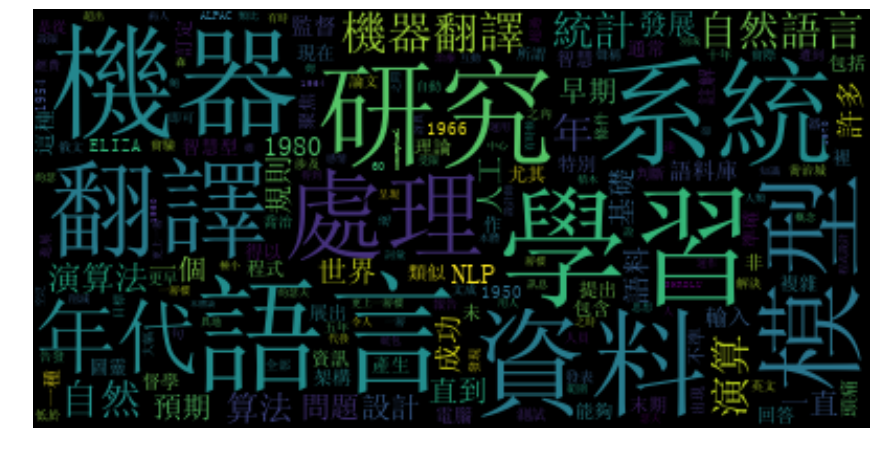

In [155]:
wordcloud = WordCloud(font_path="simsun.ttf")   
# 注意必須放數中文字體，否則會變亂碼
wordcloud.generate_from_frequencies(frequencies=Counter(terms))
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

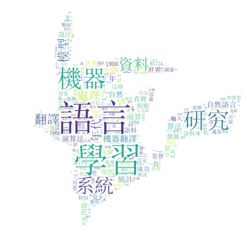

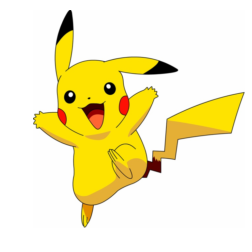

In [156]:
from PIL import Image

alice_mask = np.array(Image.open("apic4476.jpg"))
wc = WordCloud(background_color="white", max_words=5000, mask=alice_mask, font_path="simsun.ttf")
wc.generate_from_frequencies(Counter(terms))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

# 中文檢索系統

1. TFIDF
$$TFIDF_{td} = TF_{td} \times log(\frac{N}{DF_t})$$
    - 所謂TFIDF應分成兩個部分來理解：TF(Term Frequency)以及IDF(Inverted Document Frequency)。
    - TF(Term Frequency): $TF_{td}$指得是在特定的文章d中特定的字t出現了幾次。這個部分同時，也表示了一個文字在一篇文章的重要性，依但出現越多次，這個字也就越能代表這篇文章。
    - IDF(Inverted Document Frequency): N指得是總共有機篇文章，$DF_t$中的DF是Document Frequency的意思，DFt則是詞彙t在幾篇文章中出現過。$\frac{DF_t}{N}$也就是所有文章當中，詞彙t在幾篇文章出現過，而其倒數則是Inverted Documnet Index，表著這個詞彙如果在很多文章裏面都出現過，則其重要性會受到懲罰，而取log則只是讓他在分數的影響上比較平滑而已。
    
    
2. Cosine Similarity
$$\cos{\theta} = \frac{A \cdot B}{\| {A} \|_2 \| {B} \|_2}$$
    - if $A = [1,2,0,4]$ and $B = [3,2,1,0]$
    - $\cos{\theta} = \frac{1 \cdot 3 + 2 \cdot 2 + 0 \cdot 1 + 4 \cdot 0} {\sqrt{1^2+2^2+0^2+4^2} \cdot \sqrt{3^2+2^2+1^2+0^2}}$

In [157]:
import jieba
jieba.set_dictionary('dict.txt.big')  # 如果是使用繁體文字，請記得去下載繁體字典來使用
import numpy as np
import pandas as pd

In [158]:
# 把檔案讀出來(原始資料: https://society.hccg.gov.tw/ch/home.jsp?id=43&parentpath=0,5)
df_QA = pd.read_json('ProcessedData.json', encoding='utf8')
# 我們這次只會使用到question跟ans這兩個欄位
df_question = df_QA[['question', 'ans']].copy()  ## 不要更動到原始的DataFrame
df_question.drop_duplicates(inplace=True)  ## 丟掉重複的資料
df_question.head(5)  ## show出來

,question,ans
0,小孩出生後應於何時申請育兒津貼?,1.幼兒家長在戶政事務所完成新生兒出生登記後，即可向所轄區公所社政課提出育兒津貼申請。2.在...
1,小孩出生後應於何時申請育兒津貼?,隨時提出;津貼經審查通過後，追溯自受理申請之當月起發給。兒童出生後六十日內向戶政事務所完成出...
2,育兒津貼申請應備文件為何?,申請資料應備齊:(一)兒童之戶口名簿影本。(二)申請人之郵局存摺封面影本。(三)父母雙方身分...
3,若民眾夫妻雙方均失業，是否可申請家庭育兒津貼費用補助,一、育兒津貼補助對象：1.育有二足歲以下兒童。2.兒童之父母至少一方因育兒需要，致未能就業者...
4,育兒津貼補助對象為何？,育兒津貼補助對象，應符合下列規定：(一)育有二足歲以下兒童。(二)兒童之父母(或監護人)至少...


In [159]:
a=[1,2,3]
b=[4,5,6]

a1 = a.append(b)

print(a1)

b1 = a.extend(b)

print(b1)

None
None


In [160]:
#前處理
all_terms = []
def preprocess(item):  ##定義前處理的function
    # 請把將每一行用jieba.cut進行分詞(記得將cut_all設定為True)
    # 同時建立所有詞彙的list(all_terms)
    #=============your works starts===============#
    terms = [ t for t in jieba.cut(item,cut_all=True) ]
    all_terms.extend(terms)  ## 收集所有出現過的字
    #==============your works ends================#
    return terms
    


df_question['processed'] = df_question['question'].apply(preprocess)
print(df_question.iloc[0])
# question                                      小孩出生後應於何時申請育兒津貼?
# ans          1.幼兒家長在戶政事務所完成新生兒出生登記後，即可向所轄區公所社政課提出育兒津貼申請。2.在...
# processed                  [小孩, 出生, 後, 應於, 何時, 申請, 育兒, 津貼, , ]
# Name: 0, dtype: object

df_question.head()

Building prefix dict from C:\Python\Python36\IIIMaterial\08_InformationRetreival\dict.txt.big ...
Loading model from cache C:\Users\Student\AppData\Local\Temp\jieba.uff98048124f5688e07c8dae0a6df90a2.cache
Loading model cost 1.154 seconds.
Prefix dict has been built succesfully.


question                                      小孩出生後應於何時申請育兒津貼?
ans          1.幼兒家長在戶政事務所完成新生兒出生登記後，即可向所轄區公所社政課提出育兒津貼申請。2.在...
processed                  [小孩, 出生, 後, 應於, 何時, 申請, 育兒, 津貼, , ]
Name: 0, dtype: object


,question,ans,processed
0,小孩出生後應於何時申請育兒津貼?,1.幼兒家長在戶政事務所完成新生兒出生登記後，即可向所轄區公所社政課提出育兒津貼申請。2.在...,"[小孩, 出生, 後, 應於, 何時, 申請, 育兒, 津貼, , ]"
1,小孩出生後應於何時申請育兒津貼?,隨時提出;津貼經審查通過後，追溯自受理申請之當月起發給。兒童出生後六十日內向戶政事務所完成出...,"[小孩, 出生, 後, 應於, 何時, 申請, 育兒, 津貼, , ]"
2,育兒津貼申請應備文件為何?,申請資料應備齊:(一)兒童之戶口名簿影本。(二)申請人之郵局存摺封面影本。(三)父母雙方身分...,"[育兒, 津貼, 申請, 應, 備, 文件, 為, 何, , ]"
3,若民眾夫妻雙方均失業，是否可申請家庭育兒津貼費用補助,一、育兒津貼補助對象：1.育有二足歲以下兒童。2.兒童之父母至少一方因育兒需要，致未能就業者...,"[若, 民, 眾, 夫妻, 雙方, 均, 失業, , , 是否, 可, 申請, 家庭, 育兒..."
4,育兒津貼補助對象為何？,育兒津貼補助對象，應符合下列規定：(一)育有二足歲以下兒童。(二)兒童之父母(或監護人)至少...,"[育兒, 津貼, 貼補, 補助, 對象, 為, 何, , ]"


In [161]:
# 建立termindex: 將all_terms取出不重複的詞彙，並轉換型別為list(避免順序亂掉)
#=============your works starts===============#
termindex = list(set(all_terms))
#==============your works ends================#

print("len(termindex)", len(termindex))
print(termindex[:10])
# len(termindex) 1012
# ['', '耗材', '被', '其他', '發', '發現', '申請人', '遭遇', '環境', '您好']

len(termindex) 1012
['', '接下', '外縣', '至多', '請入', '法律', '幾個', '暫時', '或是', '入戶']


In [162]:
termindex

['',
 '接下',
 '外縣',
 '至多',
 '請入',
 '法律',
 '幾個',
 '暫時',
 '或是',
 '入戶',
 '接受',
 '要領',
 '居家',
 '組合',
 '體驗',
 '如家',
 '達',
 '未來',
 '發放',
 '療',
 '小組',
 '公告',
 '聲',
 '公益',
 '甚麼',
 '向',
 '法律諮詢',
 '是否',
 '務要',
 '乘',
 '前車',
 '地址',
 '多長',
 '常會',
 '人文',
 '車票',
 '欲',
 '保費',
 '訂',
 '活動',
 '撫養',
 '我',
 '房屋',
 '和解',
 '證件',
 '報告',
 '場所',
 '心服',
 '中',
 '社區活動',
 '人民團體',
 '指導',
 '設施',
 '發生',
 '報高',
 '地價',
 '新竹市',
 '例假',
 '日期',
 '其',
 '但有',
 '裡',
 '狀況',
 '經銷',
 '害人',
 '元',
 '我們',
 '基金',
 '人',
 '當',
 '被',
 '孤苦無依',
 '公車',
 '能',
 '收養人',
 '限制',
 '場',
 '保留地',
 '微型',
 '境遇',
 '仍未',
 '業務',
 '始發',
 '如有',
 '家',
 '手冊',
 '事項',
 '完小',
 '親屬',
 '強制',
 '所稱',
 '檢查',
 '其他',
 '緊急',
 '需求',
 '範圍',
 '搭乘',
 '期限',
 '諮詢服務',
 '受理',
 '令',
 '假日',
 '備',
 '數量',
 '造成',
 '民家',
 '灣',
 '家庭暴力',
 '小朋友',
 '是不是',
 '有',
 '幾歲',
 '取用',
 '養',
 '是從',
 '加課',
 '一名',
 '地',
 '措施',
 '六個',
 '何不',
 '檢附',
 '想要',
 '花眼',
 '冰箱',
 '障礙',
 '期間',
 '器具',
 '社團',
 '入',
 '重大',
 '換證',
 '通報',
 '參加',
 '腎',
 '無',
 '保險',
 '事故',
 '食物',
 '飽',
 '仍要',
 '組人',
 '單位',
 '團體',
 '擔任'

In [163]:
Doc_Length = len(df_question)  ## 計算出共有幾篇文章
Idf_vector = []

for idx,t in enumerate(termindex):
    term_count = 0
    print(t)
    for terms in df_question['processed']:
        if t in terms:
            term_count = term_count+1
    Idf_vector.append(np.log(Doc_Length/term_count))
        
print(Idf_vector[:5])


接下
外縣
至多
請入
法律
幾個
暫時
或是
入戶
接受
要領
居家
組合
體驗
如家
達
未來
發放
療
小組
公告
聲
公益
甚麼
向
法律諮詢
是否
務要
乘
前車
地址
多長
常會
人文
車票
欲
保費
訂
活動
撫養
我
房屋
和解
證件
報告
場所
心服
中
社區活動
人民團體
指導
設施
發生
報高
地價
新竹市
例假
日期
其
但有
裡
狀況
經銷
害人
元
我們
基金
人
當
被
孤苦無依
公車
能
收養人
限制
場
保留地
微型
境遇
仍未
業務
始發
如有
家
手冊
事項
完小
親屬
強制
所稱
檢查
其他
緊急
需求
範圍
搭乘
期限
諮詢服務
受理
令
假日
備
數量
造成
民家
灣
家庭暴力
小朋友
是不是
有
幾歲
取用
養
是從
加課
一名
地
措施
六個
何不
檢附
想要
花眼
冰箱
障礙
期間
器具
社團
入
重大
換證
通報
參加
腎
無
保險
事故
食物
飽
仍要
組人
單位
團體
擔任
弱勢
不能
孤苦
式
可向
現金
小時
所得
非上
如此
更換
勞
性
卡
領
漲
髖關節
生育
每年
破舊
為
一定
請安
那些
津貼費
證
報名
被保險人
應向
0
孩子
備案
車資
留職
件
途徑
定期
定要
哪個
輔導
該
殘障
康巴
健
短期
警察
接下來
放在
日托
監護
跟
換
訂車
全部
月
復健
幼稚園
時
生病
幸福
死亡
暴力事件
保留
暨
指導員
紀錄
應於
97
住宿
審查
三款
年度
重新
專車
行政
餐食
個人
工行
可獲
看護
輔
服務
不同
加國
使用
彩券
館內
多久
加害人
附
又
費
前妻
隊
用者
計算
上班
自
覺得
不符
諮詢
兩
所有
永久
一審
金領
啟
文康
注意
金生
婚後
續
諮商
法令
選舉
之前
同居人
被害
合格
以下
可不可以
核
走失
受損
離職
鑑定
扶養
遺失
重陽節
符合
訪視
立案
證明
住民
設
要付
營運
志
固定
實際
公共場所
可以
日
異動
位置
利生
親媽
他
上有
審
做
1
訓練
申辦
重複
地震
幼童
何
條例
老師
生活
證物
不一
因故
目的
4
分
薪資
一樣
生活費用
進行
學苑
申請人
拐杖
熊
人員
發現
手續
身份
媽媽
次數
好像
就業
禮金
具
市民
成安
何處
國民
耳
開辦
外籍
多少
表
可
中低
給付
防治
年金
補助額


In [164]:
# 建立IDF vector
Doc_Length = len(df_question)  ## 計算出共有幾篇文章
Idf_vector = []  ## 初始化IDF向量
for term in termindex:  ## 對index中的詞彙跑回圈
    num_of_doc_contains_term = 0  ## 計算有機篇文章出現過這個詞彙
    for terms in df_question['processed']:
        if term in terms:
            num_of_doc_contains_term += 1
    idf = np.log(Doc_Length/num_of_doc_contains_term)  ## 計算該詞彙的IDF值
    Idf_vector.append(idf)
print(len(Idf_vector))
print(termindex[:10])
print(Idf_vector[:10])

1012
['', '接下', '外縣', '至多', '請入', '法律', '幾個', '暫時', '或是', '入戶']
[0.04710446918747347, 5.786897381366708, 5.093750200806762, 5.786897381366708, 5.786897381366708, 4.688285092698598, 5.786897381366708, 5.786897381366708, 5.093750200806762, 2.7423749436432847]


In [165]:
vector = np.zeros(len(termindex))
len(vector)

1012

In [166]:
# 建立document vector
def terms_to_vector(terms):  ## 定義把terms轉換成向量的function
    ## 建立一條與termsindex等長、但值全部為零的向量(hint:dtype=np.float32)
    #=============your works starts===============#
    vector = np.zeros(len(termindex))
    #==============your works ends================#
    
    for term, count in Counter(terms).items():
        if term in termindex:
        # 計算vector上每一個字的tf值
        #=============your works starts===============#
            vector[termindex.index(term)] = count
        #==============your works ends================#

    # 計算tfidf，element-wise的將vector與Idf_vector相乘
    ## hint: 如果兩個vector的型別都是np.array，把兩條vector相乘，就會自動把向量中的每一個元素成在一起，建立出一條新的向量
    #=============your works starts===============#
    vector = vector * Idf_vector
    #==============your works ends================#
    return vector



df_question['vector'] = df_question['processed'].apply(terms_to_vector)  ## 將上面定義的function，套用在每一筆資料的terms欄位上
df_question['vector'][:10]
# 0    [0.09420893837494694, 0.0, 0.0, 0.0, 0.0, 0.0,...
# 1    [0.09420893837494694, 0.0, 0.0, 0.0, 0.0, 0.0,...
# 2    [0.09420893837494694, 0.0, 0.0, 0.0, 0.0, 0.0,...
# 3    [0.09420893837494694, 0.0, 0.0, 0.0, 0.0, 0.0,...
# 4    [0.09420893837494694, 0.0, 0.0, 0.0, 0.0, 0.0,...
# 5    [0.09420893837494694, 0.0, 0.0, 0.0, 0.0, 0.0,...
# 6    [0.28262681512484084, 0.0, 0.0, 0.0, 0.0, 0.0,...
# 7    [0.28262681512484084, 0.0, 0.0, 0.0, 0.0, 0.0,...
# 8    [0.28262681512484084, 0.0, 0.0, 0.0, 0.0, 0.0,...
# 9    [0.28262681512484084, 0.0, 0.0, 0.0, 0.0, 0.0,...
# Name: vector, dtype: object

0    [0.09420893837494694, 0.0, 0.0, 0.0, 0.0, 0.0,...
1    [0.09420893837494694, 0.0, 0.0, 0.0, 0.0, 0.0,...
2    [0.09420893837494694, 0.0, 0.0, 0.0, 0.0, 0.0,...
3    [0.09420893837494694, 0.0, 0.0, 0.0, 0.0, 0.0,...
4    [0.09420893837494694, 0.0, 0.0, 0.0, 0.0, 0.0,...
5    [0.09420893837494694, 0.0, 0.0, 0.0, 0.0, 0.0,...
6    [0.28262681512484084, 0.0, 0.0, 0.0, 0.0, 0.0,...
7    [0.28262681512484084, 0.0, 0.0, 0.0, 0.0, 0.0,...
8    [0.28262681512484084, 0.0, 0.0, 0.0, 0.0, 0.0,...
9    [0.28262681512484084, 0.0, 0.0, 0.0, 0.0, 0.0,...
Name: vector, dtype: object

In [167]:
from numpy.linalg import norm

def cosine_similarity(vector1, vector2):  ## 定義cosine相似度的計算公式
    # 使用np.dot與norm計算cosine score
    #=============your works starts===============#
    score = np.dot(vector1, vector2) / (norm(vector1)*norm(vector2))
    #==============your works ends================#
    return score

sentence1 = df_question.loc[0]  ##取出第零個的問題
sentence2 = df_question.loc[2]  ##取出第二個的問題
sentence10 = df_question.loc[10]
sentence11 = df_question.loc[11]

print('Q1:',sentence1['question'])
print('Q2:',sentence2['question'])
print('Q10:',sentence10['question'])
print('Q11:',sentence11['question'])

print(cosine_similarity(sentence1['vector'], sentence2['vector']))  ##計算兩者的相似度
print(cosine_similarity(sentence1['vector'], sentence10['vector']))  ##計算兩者的相似度
print(cosine_similarity(sentence2['vector'], sentence10['vector'])) 
print(cosine_similarity(sentence10['vector'], sentence11['vector'])) 

#=====cosine愈大表示兩個月相關=============

# 0.203227847937731

Q1: 小孩出生後應於何時申請育兒津貼?
Q2: 育兒津貼申請應備文件為何?
Q10: 親戚朋友托育，是否也可以領補助呢？
Q11: 就業者家庭部分托育費用補助申請應備文件為何？向誰申請
0.20322784793773094
0.0001145724474420257
0.000187239800803642
0.11890188091917905


In [168]:
def retrieve(testing_sentence, return_num=3):  ## 定義出檢索引擎
    # 請使用前面定義的terms_to_vector與preprocess兩個function，計算出testing_sentence的向量
    # 計算其與資料庫每一的問句的相似度
    # 依分數進行排序，找到分數最高的三個句子
    #=============your works starts===============#
    testing_vector = terms_to_vector(preprocess(testing_sentence))
    idx_score_mapping = [cosine_similarity(testing_vector,sen_vec) for sen_vec in df_question['vector'].values]
    top3_idxs = np.argsort(idx_score_mapping)[::-1][:3]
    #==============your works ends================#
    
    return df_question.loc[top3_idxs, ['question', 'ans']]

# idxs = retrieve("老人年金").index
idxs = retrieve("兒托").index
print(idxs)
# Float64Index([100.0, 111.0, 321.0], dtype='float64')
print(df_question.loc[idxs, 'question'])

Int64Index([19, 15, 14], dtype='int64')
19    要申請托育補助一定要找加入居家托育服務中心的托育人員嗎？
15                     托育費用補助對象為何？
14                     托育費用補助標準為何？
Name: question, dtype: object


# Use Scikit learn

In [169]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [170]:
text1 = """Step size shrinkage used in update to prevents overfitting. After each boosting step, we can directly get the weights of new features, and eta shrinks the feature weights to make the boosting process more conservative."""
text2 = """Since changing the base of the exponential function merely results in the appearance of an additional constant factor, it is computationally convenient to reduce the study of exponential functions in mathematical analysis to the study of this particular function, conventionally called the "natural """

tfidf = TfidfVectorizer()
tfidf.fit_transform([text1, text2]).toarray().shape


(2, 55)

In [171]:
" ".join(["A", "B", "C"])

'A B C'

In [173]:
tfidf.fit_transform(df_question['processed'].apply(lambda x:" ".join(x)).values).toarray()#.shape


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [174]:
tfidf = TfidfVectorizer()
# 使用tfidf.fit_transform將轉換df_question['processed']為vector
#=============your works starts===============#
df_question['sklearn_vector'] = list(tfidf.fit_transform(df_question['processed'].apply(lambda x:" ".join(x)).values).toarray())
#==============your works ends================#

print(df_question.loc[:10, 'sklearn_vector'].apply(sum).values)
# [2.54619627 2.54619627 1.95695906 3.12409736 2.19106254 2.74144953
#  3.82923767 2.54569516 3.4163518  2.98088982 2.35528293]

[2.54619627 2.54619627 1.95695906 3.12409736 2.19106254 2.74144953
 3.82923767 2.54569516 3.4163518  2.98088982 2.35528293]


In [175]:
# a = [''.join(preprocess(testing_sentence))]
# a
# df_question['question']


In [176]:
type(tfidf.transform([''.join(preprocess('老人年金'))]).toarray())


numpy.ndarray

In [177]:
def sklearn_retrieve(testing_sentence, return_num=3):  ## 定義出檢索引擎
    # 請使用前面定義的tfidf.transform與preprocess兩個function，計算出testing_sentence的向量
    # 注意tfidf.transform必須是兩個維度的array
    # 且out為sparse metric，必需.toarray()轉換為一般np.array()
    # 計算其與資料庫每一的問句的相似度
    # 依分數進行排序，找到分數最高的三個句子
    #=============your works starts===============#
    testing_vector = tfidf.transform([''.join(preprocess(testing_sentence))]).toarray()[0]
    idx_score_mapping = [cosine_similarity(testing_vector,sen_vec) for sen_vec in df_question['sklearn_vector'].values]
    top3_idxs = np.argsort(idx_score_mapping)[::-1][:3]
    #==============your works ends================#
    return df_question.loc[top3_idxs, ['question', 'ans']]

print(retrieve("老人年金")['question'])
print(sklearn_retrieve("老人年金")['question'])
# 100.0    我已經年滿65歲領有國民年金老人年金及基本保證年金3628元，因家境清寒還可以再申請中低收入...
# 111.0                            新竹市老人一般可領老人津貼6628元，該如何申請？
# 321.0           國民年金保險被保險人如果是家庭收入較低者，國民年金保險費是否可以減免？補助標準為何？
# Name: question, dtype: object
# 100.0    我已經年滿65歲領有國民年金老人年金及基本保證年金3628元，因家境清寒還可以再申請中低收入...
# 111.0                            新竹市老人一般可領老人津貼6628元，該如何申請？
# 321.0           國民年金保險被保險人如果是家庭收入較低者，國民年金保險費是否可以減免？補助標準為何？
# Name: question, dtype: object

100    我已經年滿65歲領有國民年金老人年金及基本保證年金3628元，因家境清寒還可以再申請中低收入...
111                            新竹市老人一般可領老人津貼6628元，該如何申請？
321           國民年金保險被保險人如果是家庭收入較低者，國民年金保險費是否可以減免？補助標準為何？
Name: question, dtype: object
325           國民年金生育給付的申請資格？
121    新竹市身心障礙者輔助器具補助申請應備文件？
103             如何申請新竹市安老津貼？
Name: question, dtype: object


c:\python\python36\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


In [178]:
print(retrieve("托育")['question'])
print(sklearn_retrieve("托育")['question'])


15                     托育費用補助對象為何？
14                     托育費用補助標準為何？
19    要申請托育補助一定要找加入居家托育服務中心的托育人員嗎？
Name: question, dtype: object
325           國民年金生育給付的申請資格？
121    新竹市身心障礙者輔助器具補助申請應備文件？
103             如何申請新竹市安老津貼？
Name: question, dtype: object


c:\python\python36\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


In [179]:
print(retrieve("補助")['question'])
print(sklearn_retrieve("補助")['question'])


214          中低收入醫療補助補助項目及標準為何？
108              申請假牙補助的資格及補助內容
82     特殊境遇家庭法律訴訟補助如何申請？補助額度如何？
Name: question, dtype: object
108        申請假牙補助的資格及補助內容
15            托育費用補助對象為何？
214    中低收入醫療補助補助項目及標準為何？
Name: question, dtype: object


In [180]:
print(retrieve("救助")['question'])
print(sklearn_retrieve("救助")['question'])


204         社會福利-急難救助核發救助對象？
74     遭遇特殊境遇家庭如何申請救助(申請方式)？
203        社會福利-我要到那裡申請急難救助？
Name: question, dtype: object
204         社會福利-急難救助核發救助對象？
203        社會福利-我要到那裡申請急難救助？
74     遭遇特殊境遇家庭如何申請救助(申請方式)？
Name: question, dtype: object
